# plotting time serie for products from dw 

C:\Users\Admin\AppData\Local\Temp\ipykernel_7276\1307017349.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


🔍 First rows:
    id                                      product_full marque    available  \
0   1   Eau minrale DLICE 1.5LDLICELa bouteille de 1.5L  DLICE  unavailable   
1   2                       Eau minrale DLICE 1.5LDLICE  DLICE    available   
2   3  Eau minrale  SAFIA 1.5LSAFIALa bouteille de 1.5L  SAFIA  unavailable   
3   4                      Eau minrale  SAFIA 1.5LSAFIA  SAFIA    available   
4   5   Eau minrale TIJEN 1.5LTIJENLa bouteille de 1.5L  TIJEN  unavailable   

       store  category  prix_2025_winter  prix_2024_fall  prix_2024_summer  \
0  carrefour  boissons            0.0000            0.00              0.00   
1  carrefour  boissons            0.6596            0.66              0.69   
2  carrefour  boissons            0.0000            0.00              0.00   
3  carrefour  boissons            0.6693            0.67              0.69   
4  carrefour  boissons            0.0000            0.00              0.00   

   prix_2024_spring  ...  prix_2020_sprin

C:\Users\Admin\AppData\Local\Temp\ipykernel_7276\1307017349.py:64: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


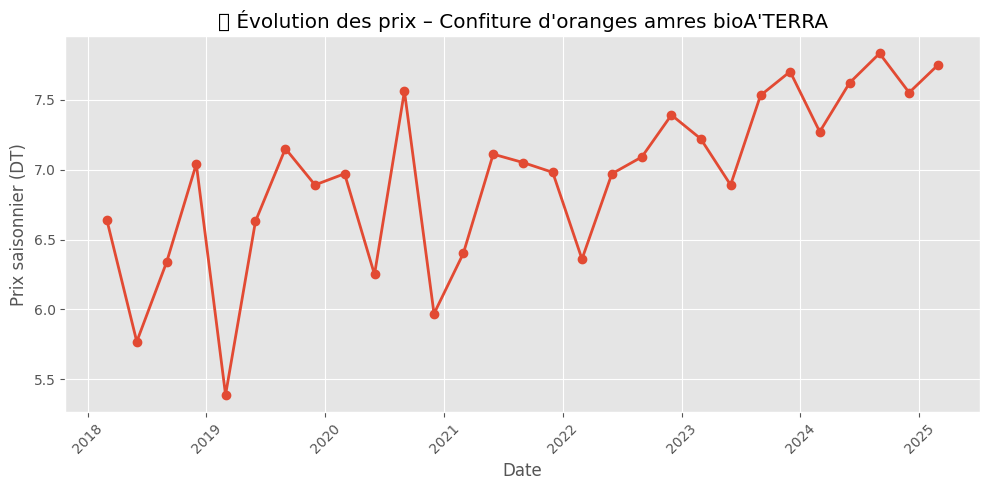

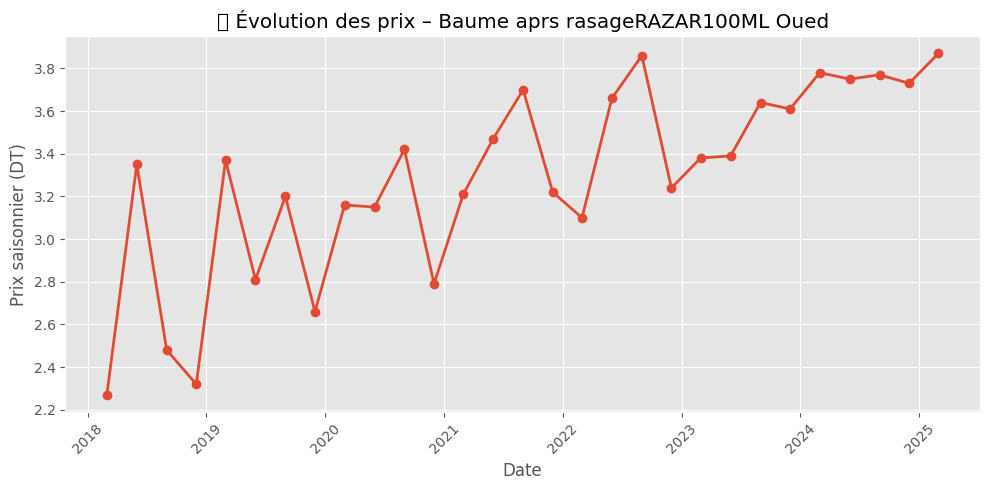

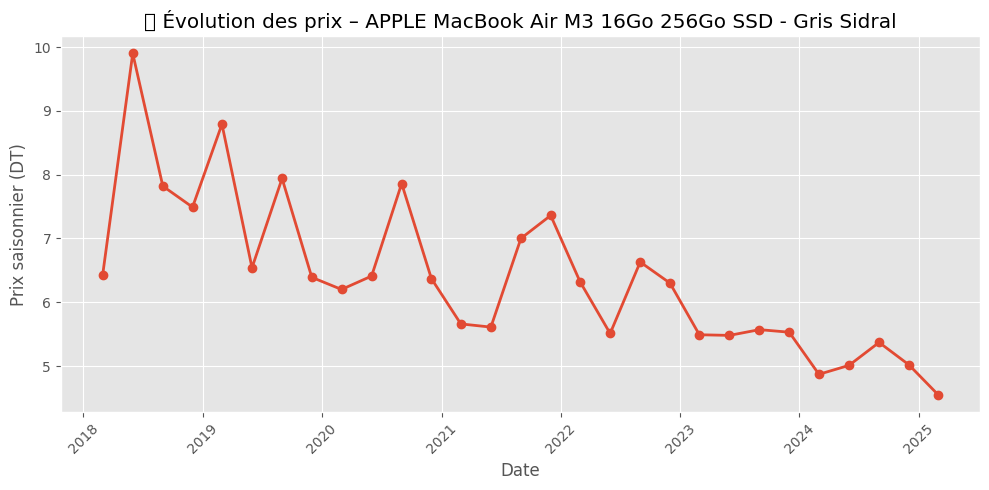

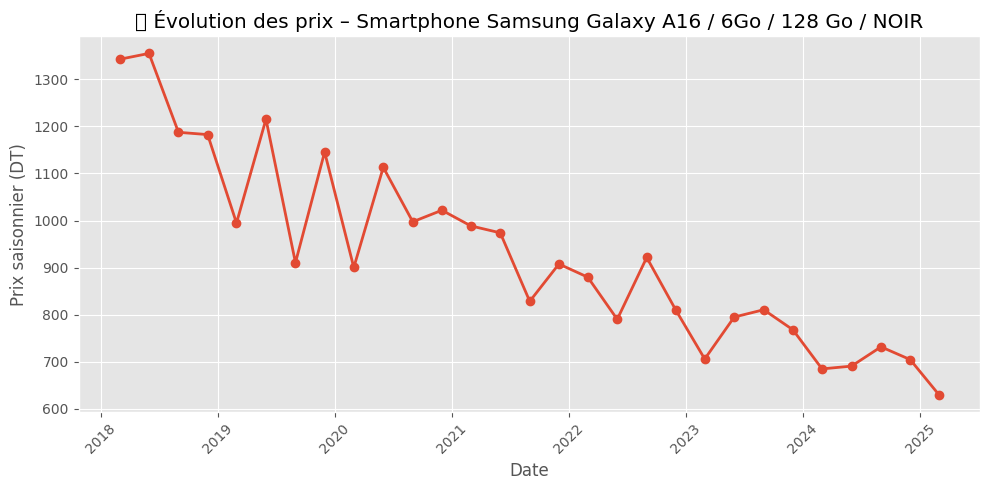

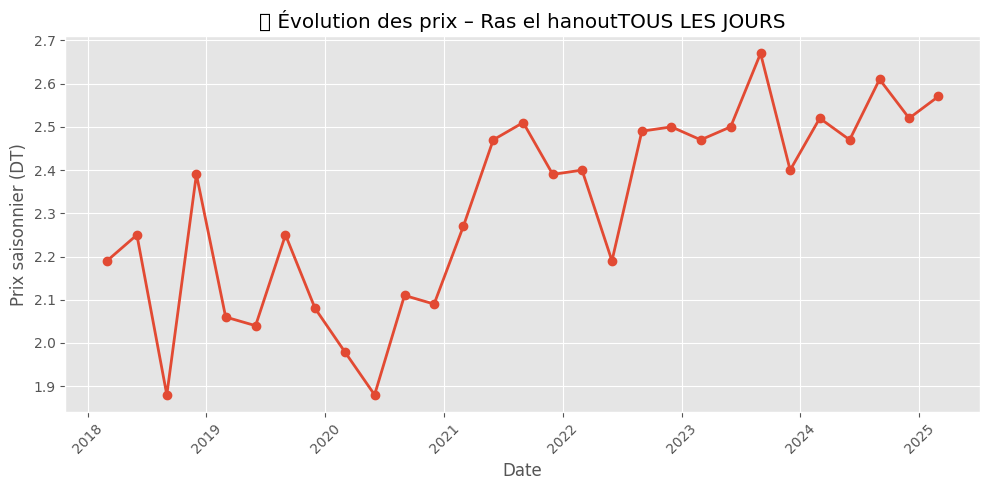

In [6]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mysql.connector

# ✅ Connect to MySQL (phpMyAdmin/XAMPP)
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# ✅ Load the full all_products table
query = "SELECT * FROM all_products"
df = pd.read_sql(query, conn)
conn.close()

# 🔍 Diagnostics
print("🔍 First rows:\n", df.head())
print("📋 Columns:\n", df.columns.tolist())
print("📊 Shape:", df.shape)

# 🧹 Reshape to long format
price_cols = [col for col in df.columns if col.startswith("prix_")]
df_long = df.melt(
    id_vars=["product_full", "marque", "category", "available", "store"],
    value_vars=price_cols,
    var_name="periode",
    value_name="prix_saisonnier"
)

# 🧠 Extract year & season
df_long[['year', 'season']] = df_long['periode'].str.extract(r"prix_(\d{4})_(\w+)?")
df_long['year'] = df_long['year'].fillna('2025').astype(int)
df_long['season'] = df_long['season'].fillna('winter')

# ⏳ Convert to datetime
season_order = {'winter': 1, 'spring': 2, 'summer': 3, 'fall': 4}
df_long['season_num'] = df_long['season'].map(season_order)
df_long['date'] = pd.to_datetime(df_long['year'].astype(str) + "-" + (df_long['season_num'] * 3).astype(str) + "-01")

# 📊 Sort and select products to visualize
df_long.sort_values(by=["product_full", "date"], inplace=True)
unique_products = df_long['product_full'].dropna().unique()
products_to_plot = np.random.choice(unique_products, size=min(5, len(unique_products)), replace=False)

# 🎨 Style
#plt.style.use("seaborn-darkgrid")
plt.style.use("ggplot")  # or 'classic', 'bmh', 'fivethirtyeight'


# 📈 Plot price evolution per product
for product in products_to_plot:
    subset = df_long[df_long['product_full'] == product]

    plt.figure(figsize=(10, 5))
    plt.plot(subset['date'], subset['prix_saisonnier'], marker='o', linewidth=2)
    plt.title(f"📈 Évolution des prix – {product}")
    plt.xlabel("Date")
    plt.ylabel("Prix saisonnier (DT)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# time serie for hotel 


C:\Users\Admin\AppData\Local\Temp\ipykernel_7276\3804796428.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7276\3804796428.py:65: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


🔍 Preview:
    id                          name    price                  formule  \
0   1  Iris Djerba Hotel & Thalasso  151.417          Logement Simple   
1   2                Olympic Djerba  160.230  Logement Petit Déjeuner   
2   3                  Hotel Mizwar  173.964  Logement Petit Déjeuner   
3   4                  Diar Yassine  206.010  Logement Petit Déjeuner   
4   5           Hotel Djerba Resort  215.125  Logement Petit Déjeuner   

   nb_etoiles  rating    city  distance_centre_ville agency_name  \
0           5    11.5  Djerba                  19.81     touring   
1           2    13.0  Djerba                  40.04     touring   
2           5    10.1  Djerba                  26.68     touring   
3           2    16.1  Djerba                  20.32     touring   
4           5    16.5  Djerba                  24.99     touring   

   nbr_travellers  ... prix_2020_summer  prix_2020_spring  prix_2019_winter  \
0             783  ...           149.18            116.57    

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


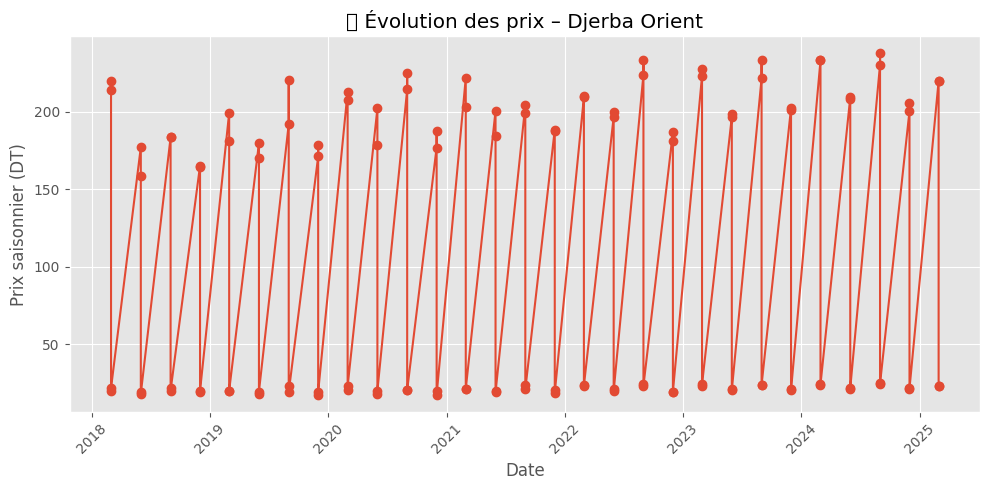

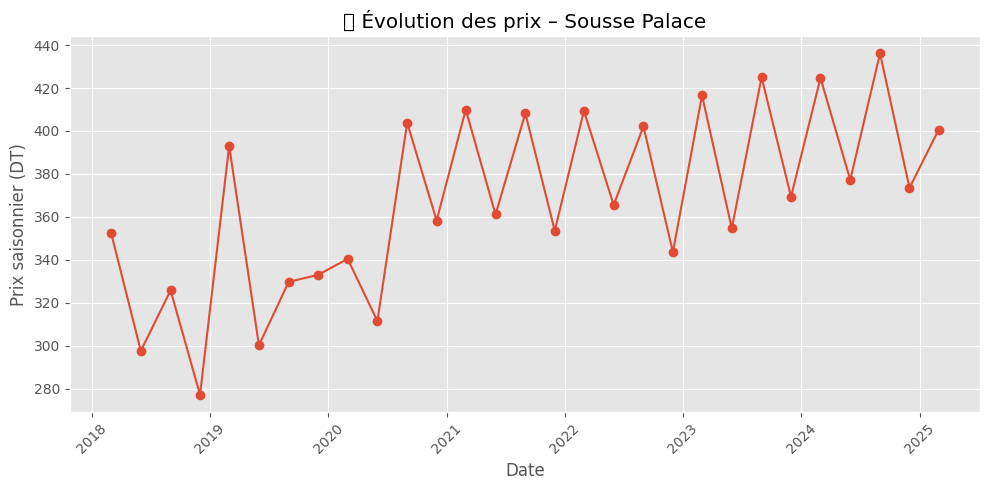

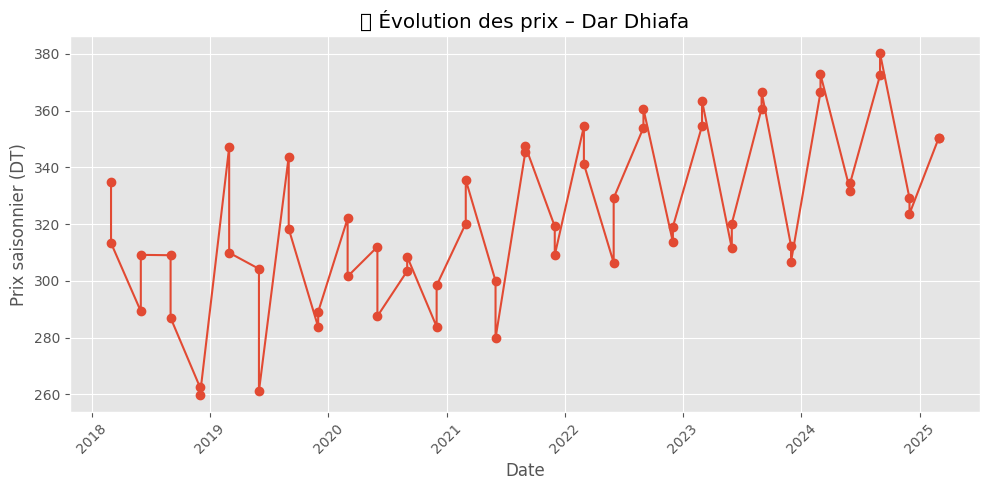

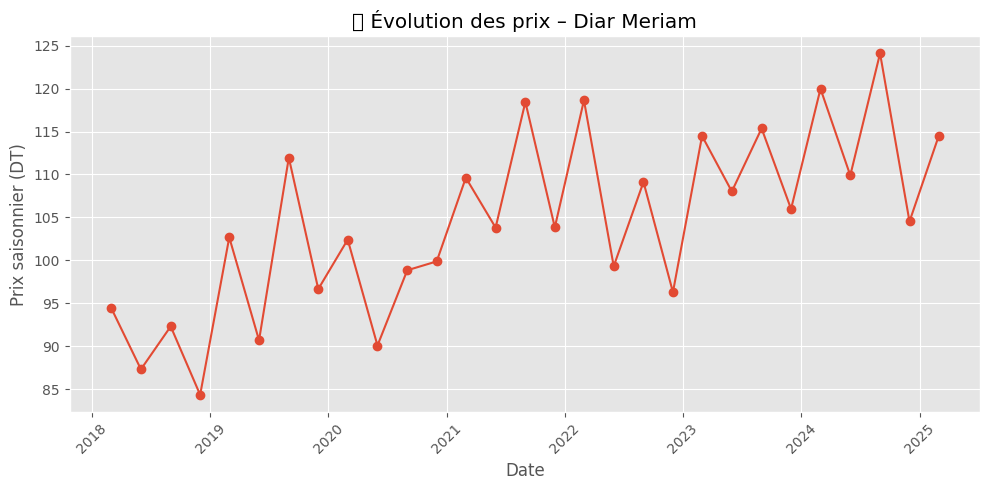

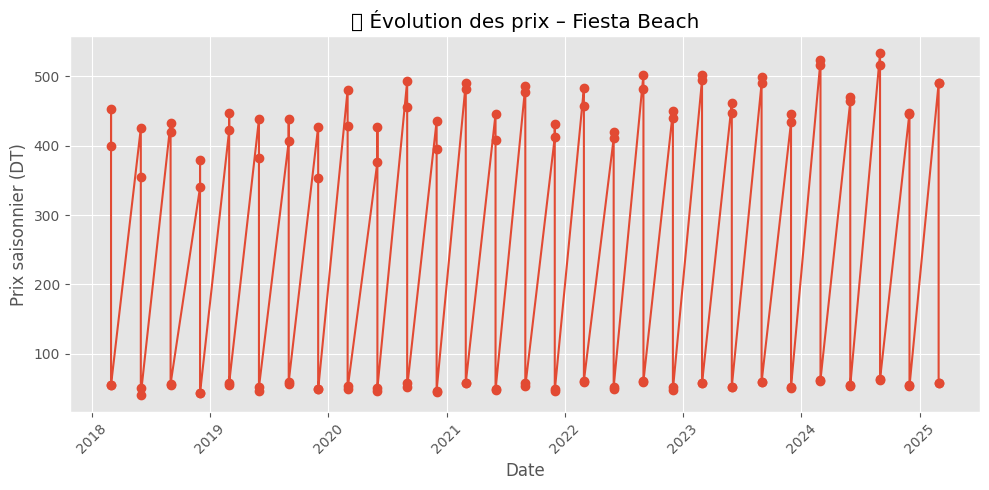

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

# ✅ Step 1: Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"   # replace with your actual DB name
)

# ✅ Step 2: Load hotel data from the "hotels" table
query = "SELECT * FROM hotels"
df = pd.read_sql(query, conn)
conn.close()

# ✅ Diagnostics
print("🔍 Preview:\n", df.head())
print("📋 Columns:\n", df.columns.tolist())
print("📊 Shape:", df.shape)

# ✅ Step 3: Extract seasonal price columns
price_cols = [col for col in df.columns if col.startswith("prix_")]

# ✅ Step 4: Melt wide to long format
df_long = pd.melt(
    df,
    id_vars=["name", "city", "nb_etoiles", "agency_name"],
    value_vars=price_cols,
    var_name="periode",
    value_name="prix_saisonnier"
)

# ✅ Step 5: Extract year & season and convert to datetime
df_long[['year', 'season']] = df_long['periode'].str.extract(r"prix_(\d{4})_(\w+)?")
df_long['year'] = df_long['year'].fillna('2025').astype(int)
df_long['season'] = df_long['season'].fillna('winter')

season_map = {'winter': 1, 'spring': 2, 'summer': 3, 'fall': 4}
df_long['season_num'] = df_long['season'].map(season_map)
df_long['date'] = pd.to_datetime(df_long['year'].astype(str) + "-" + (df_long['season_num'] * 3).astype(str) + "-01")

# ✅ Step 6: Sort by name and date
df_long.sort_values(by=["name", "date"], inplace=True)

# ✅ Step 7: Randomly sample 5 hotels
unique_hotels = df_long['name'].dropna().unique()
sample_hotels = np.random.choice(unique_hotels, size=min(5, len(unique_hotels)), replace=False)

# ✅ Step 8: Plot price trends
plt.style.use("ggplot")  # or use 'classic', 'bmh', etc. if seaborn isn't installed

for hotel in sample_hotels:
    subset = df_long[df_long['name'] == hotel]

    plt.figure(figsize=(10, 5))
    plt.plot(subset['date'], subset['prix_saisonnier'], marker='o')
    plt.title(f"📈 Évolution des prix – {hotel}")
    plt.xlabel("Date")
    plt.ylabel("Prix saisonnier (DT)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# foresee reading from dw

C:\Users\Admin\AppData\Local\Temp\ipykernel_10360\2499743442.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


🔍 Preview:
    id                                      product_full marque    available  \
0   1   Eau minrale DLICE 1.5LDLICELa bouteille de 1.5L  DLICE  unavailable   
1   2                       Eau minrale DLICE 1.5LDLICE  DLICE    available   
2   3  Eau minrale  SAFIA 1.5LSAFIALa bouteille de 1.5L  SAFIA  unavailable   
3   4                      Eau minrale  SAFIA 1.5LSAFIA  SAFIA    available   
4   5   Eau minrale TIJEN 1.5LTIJENLa bouteille de 1.5L  TIJEN  unavailable   

       store  category  prix_2025_winter  prix_2024_fall  prix_2024_summer  \
0  carrefour  boissons            0.0000            0.00              0.00   
1  carrefour  boissons            0.6596            0.66              0.69   
2  carrefour  boissons            0.0000            0.00              0.00   
3  carrefour  boissons            0.6693            0.67              0.69   
4  carrefour  boissons            0.0000            0.00              0.00   

   prix_2024_spring  ...  prix_2020_spring  

12:03:33 - cmdstanpy - INFO - Chain [1] start processing
12:03:34 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/10 [00:00<?, ?it/s]12:03:34 - cmdstanpy - INFO - Chain [1] start processing
12:03:34 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 1/10 [00:00<00:01,  4.74it/s]12:03:34 - cmdstanpy - INFO - Chain [1] start processing
12:03:34 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 2/10 [00:00<00:01,  5.83it/s]12:03:34 - cmdstanpy - INFO - Chain [1] start processing
12:03:34 - cmdstanpy - INFO - Chain [1] done processing
 30%|███       | 3/10 [00:00<00:01,  5.38it/s]12:03:34 - cmdstanpy - INFO - Chain [1] start processing
12:03:34 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 4/10 [00:00<00:01,  5.36it/s]12:03:34 - cmdstanpy - INFO - Chain [1] start processing
12:03:35 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 5/10 [00:00<00:00,  5.27it/s]12:03:35 - cmdstanpy - INFO - Chain [1] start processi


📊 Forecast Accuracy for Pelle  poussireTOUS LES JOURS:

  horizon       mae      rmse      mape
0 67 days  0.059560  0.059653  0.070664
1 69 days  0.040355  0.043361  0.044679
2 72 days  0.089670  0.110856  0.106790
3 74 days  0.092730  0.111614  0.109137
4 77 days  0.083862  0.099340  0.079393


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


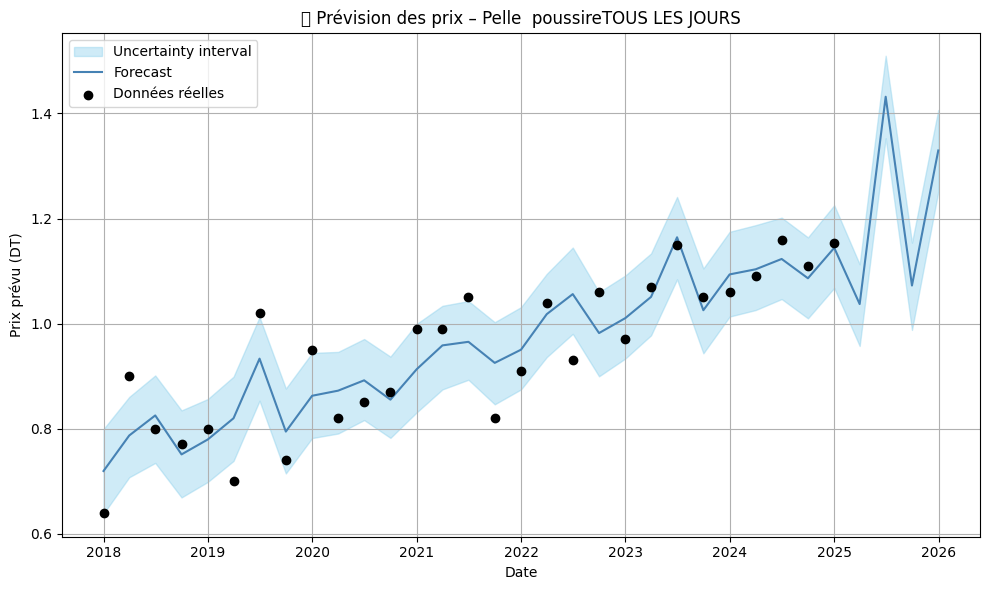

12:03:36 - cmdstanpy - INFO - Chain [1] start processing
12:03:37 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/10 [00:00<?, ?it/s]12:03:37 - cmdstanpy - INFO - Chain [1] start processing
12:03:37 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 1/10 [00:00<00:05,  1.54it/s]12:03:37 - cmdstanpy - INFO - Chain [1] start processing
12:03:38 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 2/10 [00:01<00:06,  1.29it/s]12:03:38 - cmdstanpy - INFO - Chain [1] start processing
12:03:38 - cmdstanpy - INFO - Chain [1] done processing
 30%|███       | 3/10 [00:01<00:03,  1.88it/s]12:03:38 - cmdstanpy - INFO - Chain [1] start processing
12:03:39 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 4/10 [00:02<00:02,  2.25it/s]12:03:39 - cmdstanpy - INFO - Chain [1] start processing
12:03:39 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 5/10 [00:02<00:01,  2.68it/s]12:03:39 - cmdstanpy - INFO - Chain [1] start processi


📊 Forecast Accuracy for BireBECKS25CL:

  horizon       mae      rmse      mape
0 67 days  1.144794  1.144958  0.455455
1 69 days  0.760818  0.843673  0.271793
2 72 days  0.283345  0.304996  0.106846
3 74 days  0.097498  0.121788  0.036789
4 77 days  0.023504  0.023526  0.008929


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


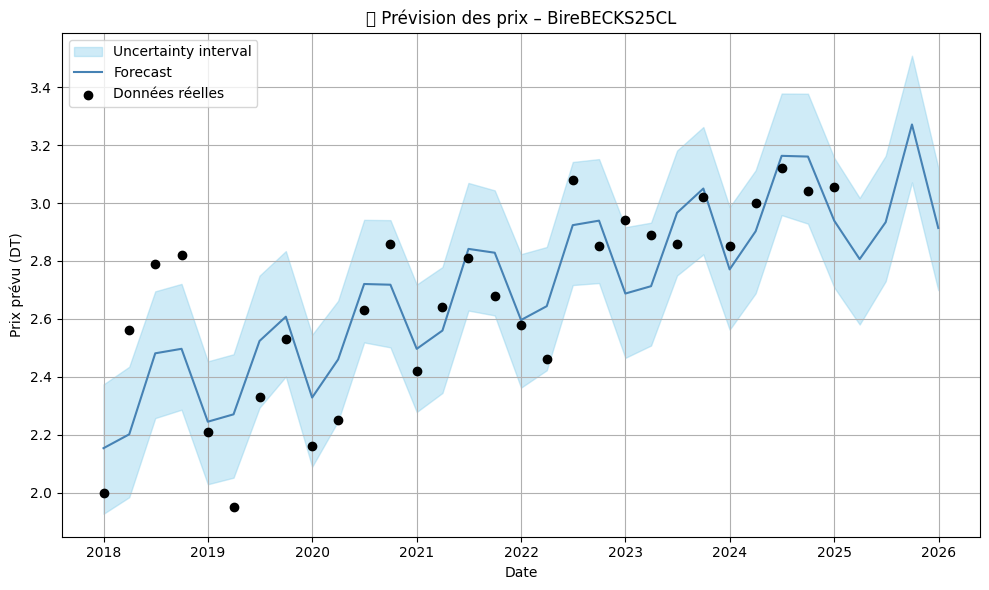

12:03:41 - cmdstanpy - INFO - Chain [1] start processing
12:03:41 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/10 [00:00<?, ?it/s]12:03:41 - cmdstanpy - INFO - Chain [1] start processing
12:03:41 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 1/10 [00:00<00:02,  3.98it/s]12:03:42 - cmdstanpy - INFO - Chain [1] start processing
12:03:42 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 2/10 [00:00<00:01,  4.03it/s]12:03:42 - cmdstanpy - INFO - Chain [1] start processing
12:03:42 - cmdstanpy - INFO - Chain [1] done processing
 30%|███       | 3/10 [00:00<00:01,  4.03it/s]12:03:42 - cmdstanpy - INFO - Chain [1] start processing
12:03:42 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 4/10 [00:01<00:01,  3.77it/s]12:03:42 - cmdstanpy - INFO - Chain [1] start processing
12:03:42 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 5/10 [00:01<00:01,  3.61it/s]12:03:43 - cmdstanpy - INFO - Chain [1] start processi


📊 Forecast Accuracy for Dodorant hommeUDV200ML:

  horizon       mae      rmse      mape
0 67 days  2.003816  2.569247  0.251053
1 69 days  0.420442  0.428005  0.054987
2 72 days  0.302500  0.337236  0.038520
3 74 days  0.365982  0.417500  0.044299
4 77 days  0.361606  0.424056  0.042788


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


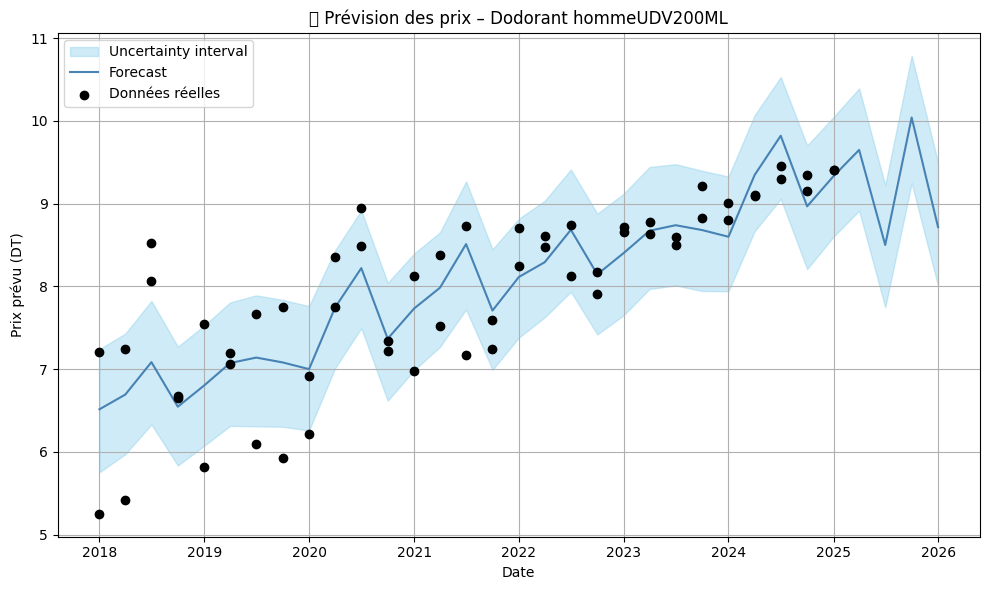

100%|██████████| 10/10 [00:00<00:00, 10.62it/s]
12:03:46 - cmdstanpy - INFO - Chain [1] start processing



📊 Forecast Accuracy for Biscuits sals got fromageCRACKER'SLe paquet de 65g:

⚠️ Cross-validation failed for Biscuits sals got fromageCRACKER'SLe paquet de 65g: "['mape'] not in index"


12:03:46 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/10 [00:00<?, ?it/s]12:03:46 - cmdstanpy - INFO - Chain [1] start processing
12:03:46 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 1/10 [00:00<00:01,  4.63it/s]12:03:46 - cmdstanpy - INFO - Chain [1] start processing
12:03:46 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 2/10 [00:00<00:01,  4.30it/s]12:03:46 - cmdstanpy - INFO - Chain [1] start processing
12:03:47 - cmdstanpy - INFO - Chain [1] done processing
 30%|███       | 3/10 [00:00<00:01,  3.86it/s]12:03:47 - cmdstanpy - INFO - Chain [1] start processing
12:03:47 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 4/10 [00:01<00:01,  3.39it/s]12:03:47 - cmdstanpy - INFO - Chain [1] start processing
12:03:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 5/10 [00:01<00:01,  3.57it/s]12:03:47 - cmdstanpy - INFO - Chain [1] start processing
12:03:48 - cmdstanpy - INFO - Chain [1] done processin


📊 Forecast Accuracy for Blush onTOPFACEN002 Instyle:

  horizon       mae       rmse      mape
0 67 days  7.008059   9.781189  0.344679
1 69 days  8.579647  10.059416  0.414929
2 72 days  2.664253   2.745648  0.126346
3 74 days  1.037282   1.415652  0.052955
4 77 days  0.301554   0.377841  0.013964


C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


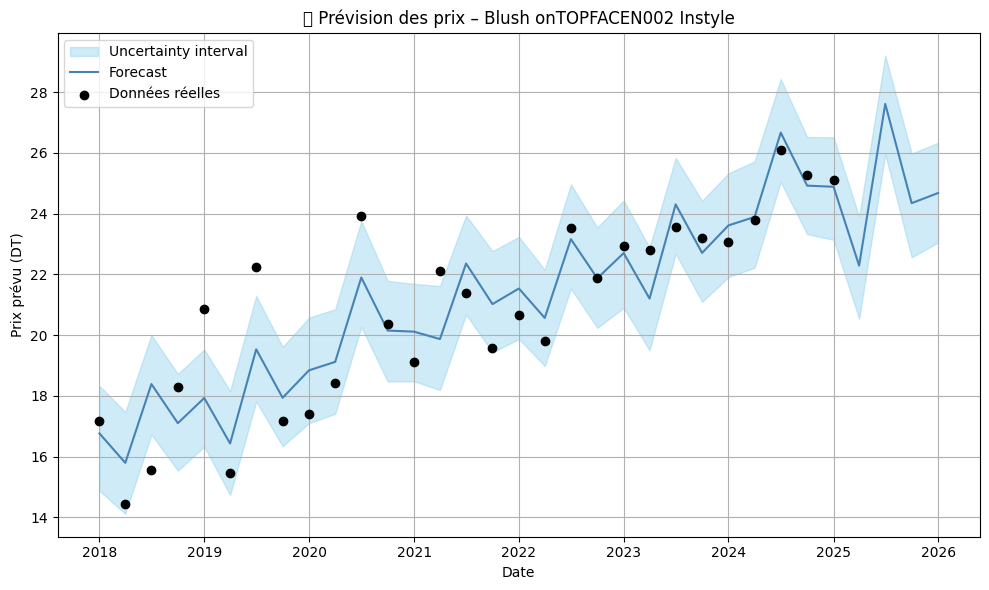

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import mysql.connector

# ✅ Step 1: Connect to MySQL DW
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# ✅ Step 2: Query full products data
query = "SELECT * FROM all_products"
df = pd.read_sql(query, conn)
conn.close()

# ✅ Quick check
print("🔍 Preview:\n", df.head())
print("📋 Columns:\n", df.columns.tolist())
print("📊 Shape:", df.shape)

# 🔄 Reshape into time series format
price_cols = [col for col in df.columns if col.startswith("prix_")]
df_long = df.melt(
    id_vars=["product_full", "marque", "category", "available", "store"],
    value_vars=price_cols,
    var_name="periode",
    value_name="prix_saisonnier"
)

# 📅 Extract year and season
df_long[['year', 'season']] = df_long['periode'].str.extract(r"prix_(\d{4})_(\w+)?")
df_long['year'] = df_long['year'].fillna('2025').astype(int)
df_long['season'] = df_long['season'].fillna('winter')

# 📆 Convert season → month → datetime
season_map = {'winter': 1, 'spring': 4, 'summer': 7, 'fall': 10}
df_long['month'] = df_long['season'].map(season_map)
df_long['date'] = pd.to_datetime(df_long[['year', 'month']].assign(day=1))

# 🎯 Sample some products
unique_products = df_long['product_full'].dropna().unique()
products_to_plot = np.random.choice(unique_products, size=min(5, len(unique_products)), replace=False)

# 🔮 Forecast & Evaluate
for product in products_to_plot:
    subset = df_long[df_long['product_full'] == product][['date', 'prix_saisonnier']].dropna()
    subset = subset.rename(columns={'date': 'ds', 'prix_saisonnier': 'y'})

    if len(subset) < 12:
        print(f"⏭️ Not enough data to forecast for: {product}")
        continue

    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(subset)

    # ⏳ Cross-validation (backtesting)
    try:
        df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='180 days')
        df_perf = performance_metrics(df_cv)

        print(f"\n📊 Forecast Accuracy for {product}:\n")
        print(df_perf[['horizon', 'mae', 'rmse', 'mape']].head())
    except Exception as e:
        print(f"⚠️ Cross-validation failed for {product}: {e}")
        continue

    # 🔮 Forecast future prices
    future = model.make_future_dataframe(periods=4, freq='Q')
    forecast = model.predict(future)

    # 🧼 Clip negative predictions
    forecast[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

    # 📈 Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='skyblue', alpha=0.4, label="Uncertainty interval")
    ax.plot(forecast['ds'], forecast['yhat'], color='steelblue', label="Forecast")
    ax.scatter(subset['ds'], subset['y'], color='black', label="Données réelles", zorder=5)
    ax.set_title(f"📉 Prévision des prix – {product}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Prix prévu (DT)")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_8388\1629495061.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn, params=(hotel_name,))
11:22:36 - cmdstanpy - INFO - Chain [1] start processing
11:22:36 - cmdstanpy - INFO - Chain [1] done processing


🏨 Selected hotel: Hari Club Beach Resort
📈 Forecasting for hotel: Hari Club Beach Resort


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(
C:\Users\Admin\AppData\Local\Temp\ipykernel_8388\1629495061.py:77: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


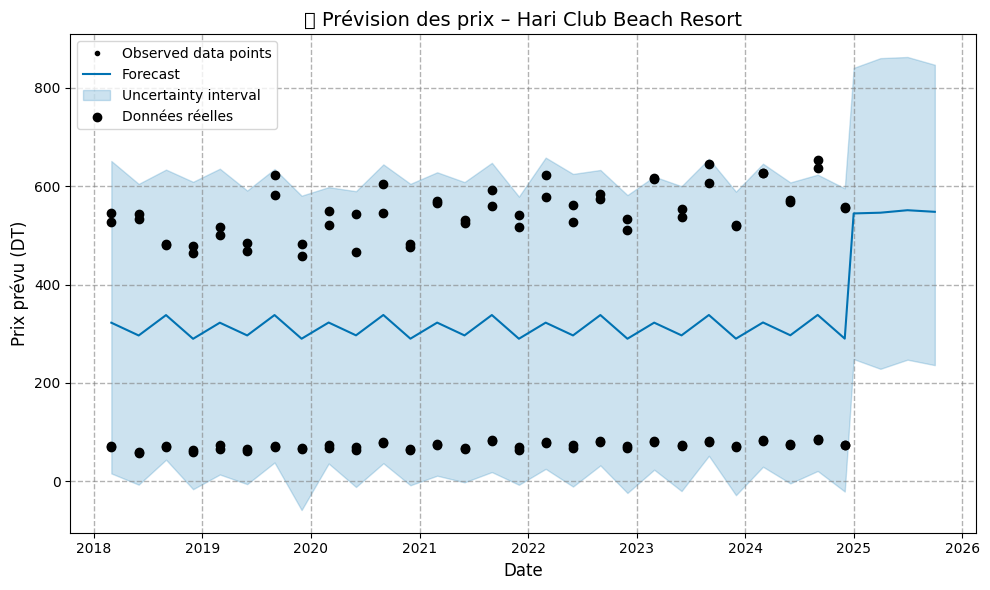

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import mysql.connector
import numpy as np

# ✅ Connect to your MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# ✅ Choose a random hotel name
cursor = conn.cursor()
cursor.execute("""
    SELECT DISTINCT name 
    FROM hotels 
    WHERE name IS NOT NULL 
    ORDER BY RAND()
    LIMIT 1
""")
hotel_name = cursor.fetchone()[0]
print(f"🏨 Selected hotel: {hotel_name}")
cursor.close()

# ✅ Load hotel data for that specific hotel
query = "SELECT * FROM hotels WHERE name = %s"
df = pd.read_sql(query, conn, params=(hotel_name,))
conn.close()

# ✅ Melt seasonal prices
price_cols = [col for col in df.columns if col.startswith("prix_")]
df_long = pd.melt(
    df,
    id_vars=['name', 'city', 'formule'],
    value_vars=price_cols,
    var_name='periode',
    value_name='prix_saisonnier'
)

# ✅ Extract date from column names
df_long[['year', 'season']] = df_long['periode'].str.extract(r"prix_(\d{4})_(\w+)?")
df_long['season'] = df_long['season'].fillna('winter')
season_map = {'winter': 1, 'spring': 2, 'summer': 3, 'fall': 4}
df_long['season_num'] = df_long['season'].map(season_map)
df_long['date'] = pd.to_datetime(df_long['year'] + '-' + (df_long['season_num'] * 3).astype(str) + '-01')

# ✅ Prepare time series
subset = df_long[['date', 'prix_saisonnier']].dropna()
subset = subset.rename(columns={'date': 'ds', 'prix_saisonnier': 'y'})

if len(subset) < 10:
    print("❌ Not enough data for forecasting.")
else:
    print(f"📈 Forecasting for hotel: {hotel_name}")
    
    model = Prophet(yearly_seasonality=True)
    model.fit(subset)

    future = model.make_future_dataframe(periods=4, freq='Q')
    forecast = model.predict(future)

    # ✅ Enhanced Plot
    fig = model.plot(forecast)
    
    # 🟣 Overlay real historical data
    plt.scatter(subset['ds'], subset['y'], color='black', label='Données réelles', zorder=10)
    
    # 🧼 Styling
    plt.title(f"📉 Prévision des prix – {hotel_name}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Prix prévu (DT)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


#arima predictions 


In [10]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 961.9 kB/s eta 0:00:11
   -- ------------------------------------- 0.8/11.1 MB 1.0 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/11.1 MB 1.1 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/11.1 MB 1.2 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.1 MB 1.2 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.1 MB 1.1 MB/s eta 0:00:10
   ------- -------------------------------- 2.1/11.1 MB 1.2 MB/s eta 0:00:08
   --------- ------------------------------ 2.6/11.1 MB 1.3 MB/s eta 0:00:07
   ----------- ---------------------------- 3.1/11.1 MB 1.4 MB/s eta 0:00:06
   ------------- -------------------------- 3.7/11.1 MB 1.5 MB/s eta 0:00:05
   ---------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


📦 Selected product: Smartphone XIAOMI Redmi Note 14 Pro / 4G / 12 Go / 512 Go / Noir

📊 ARIMA Forecast for Smartphone XIAOMI Redmi Note 14 Pro / 4G / 12 Go / 512 Go / Noir
RMSE: 146.09
MAPE: 8.33%


C:\Users\Admin\AppData\Local\Temp\ipykernel_9848\3941217424.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn, params=(product_name,))
C:\Users\Admin\AppData\Local\Temp\ipykernel_9848\3941217424.py:39: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(start='2018-01-01', periods=len(price_cols), freq='Q')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9848\3941217424.py:71: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


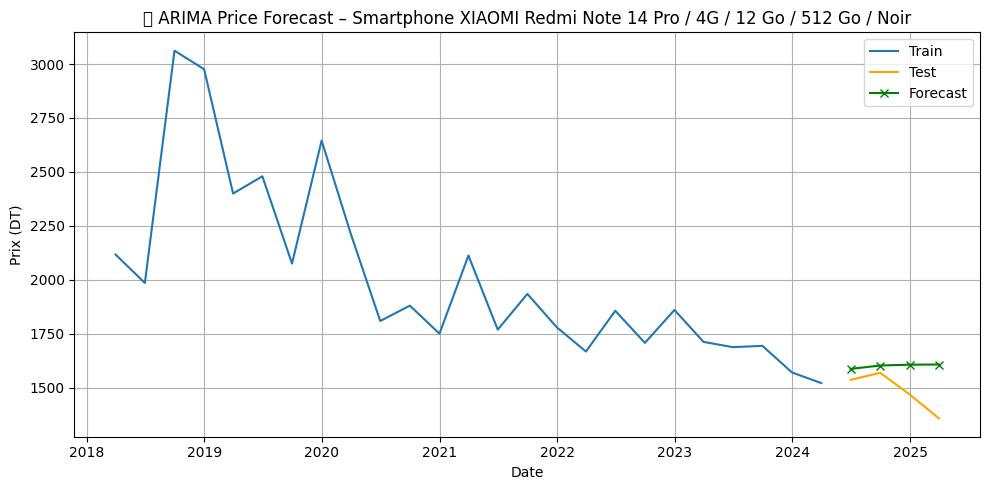

In [11]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ✅ Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# ✅ Select one random product
cursor = conn.cursor()
cursor.execute("""
    SELECT DISTINCT product_full 
    FROM all_products 
    WHERE product_full IS NOT NULL 
    ORDER BY RAND()
    LIMIT 1
""")
product_name = cursor.fetchone()[0]
print(f"📦 Selected product: {product_name}")
cursor.close()

# ✅ Fetch data
query = f"SELECT * FROM all_products WHERE product_full = %s"
df = pd.read_sql(query, conn, params=(product_name,))
conn.close()

# ✅ Extract + sort seasonal price columns
price_cols = sorted([col for col in df.columns if col.startswith('prix_')])
prices = df[price_cols].iloc[0].values.astype(float)

# ✅ Create quarterly date index
dates = pd.date_range(start='2018-01-01', periods=len(price_cols), freq='Q')
ts = pd.Series(prices, index=dates)

# ✅ Split into train/test
train = ts[:-4]
test = ts[-4:]

# ✅ Fit ARIMA (auto-tuning can be added, here using (1,1,1) as default)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# ✅ Forecast
forecast = model_fit.forecast(steps=4)
forecast.index = test.index

# ✅ Evaluate
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100
print(f"\n📊 ARIMA Forecast for {product_name}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# ✅ Plot
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(forecast.index, forecast, label='Forecast', color='green', marker='x')
plt.title(f"📉 ARIMA Price Forecast – {product_name}")
plt.xlabel("Date")
plt.ylabel("Prix (DT)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#code yosr 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# ✅ Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# ✅ Load tables from DW
fact_flight = pd.read_sql("SELECT * FROM fact_flight", conn)
dim_flight = pd.read_sql("SELECT * FROM dim_flight", conn)
conn.close()

# ✅ Merge tables
data = pd.merge(fact_flight, dim_flight, how='inner', left_on='fk_flights', right_on='id_flights')
data.columns = data.columns.str.strip()

print(data.columns.tolist())



['id_x', 'fk_flights', 'localisation_fk', 'date_fk', 'price', 'saison_touristique', 'nombre_escales', 'distance_vol_km', 'cancelled', 'taxe_price', 'prix_final', 'id_y', 'id_flights', 'airline', 'departure_date', 'departure_hour', 'arrival_date', 'arrival_hour', 'code_pay']


C:\Users\Admin\AppData\Local\Temp\ipykernel_14800\2864431432.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact_flight = pd.read_sql("SELECT * FROM fact_flight", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14800\2864431432.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_flight = pd.read_sql("SELECT * FROM dim_flight", conn)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14800\94250018.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact_flight = pd.read_sql("SELECT * FROM fact_flight", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14800\94250018.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_flight = pd.read_sql("SELECT * FROM dim_flight", conn)



🎯 Moyenne CV : 0.90

✅ Accuracy : 0.90

📋 Rapport :
              precision    recall  f1-score   support

  Non annulé       0.90      1.00      0.95       643
      Annulé       1.00      0.00      0.00        71

    accuracy                           0.90       714
   macro avg       0.95      0.50      0.47       714
weighted avg       0.91      0.90      0.85       714



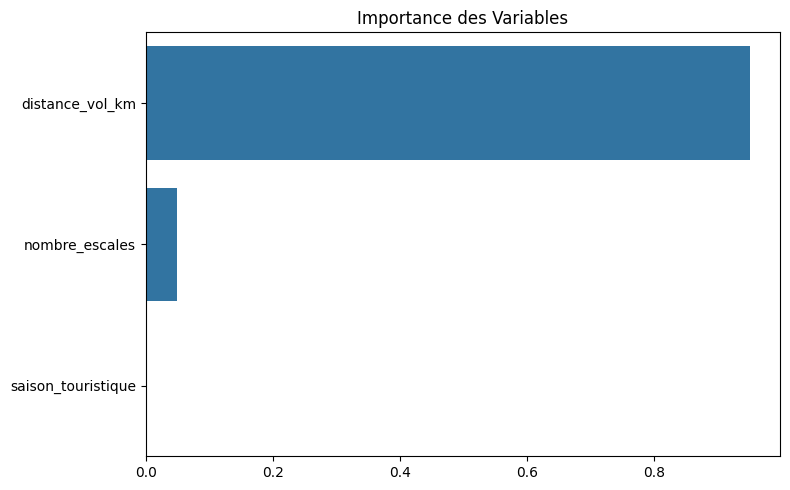

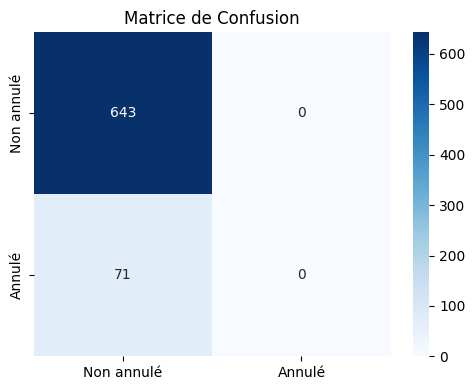

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# ✅ Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# ✅ Load tables from DW
fact_flight = pd.read_sql("SELECT * FROM fact_flight", conn)
dim_flight = pd.read_sql("SELECT * FROM dim_flight", conn)
conn.close()

# ✅ Merge tables
data = pd.merge(fact_flight, dim_flight, how='inner', left_on='fk_flights', right_on='id_flights')
data.columns = data.columns.str.strip()
# ✅ Feature & target selection
features = ['distance_vol_km', 'nombre_escales', 'saison_touristique']
target = 'cancelled'


X = data[features]
y = data[target]

# ✅ Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ✅ Train model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# ✅ Cross-validation
cv_score = cross_val_score(model, X_scaled, y, cv=5)
print(f"\n🎯 Moyenne CV : {cv_score.mean():.2f}")

# ✅ Evaluate
y_pred = model.predict(X_test)
print(f"\n✅ Accuracy : {accuracy_score(y_test, y_pred):.2f}")
print("\n📋 Rapport :")
print(classification_report(y_test, y_pred, target_names=['Non annulé', 'Annulé'], zero_division=1))

# ✅ Feature importance
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Importance des Variables")
plt.tight_layout()
plt.show()

# ✅ Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non annulé', 'Annulé'],
            yticklabels=['Non annulé', 'Annulé'])
plt.title("Matrice de Confusion")
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10652\1426945069.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact_flight = pd.read_sql("SELECT * FROM fact_flight", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10652\1426945069.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_flight = pd.read_sql("SELECT * FROM dim_flight", conn)


Class distribution before SMOTE: Counter({0: 2129, 1: 249})
Class distribution after SMOTE: Counter({0: 2129, 1: 2129})


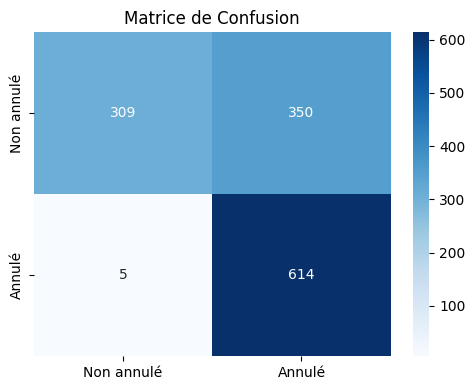

✅ Accuracy: 0.72

📋 Classification Report:
              precision    recall  f1-score   support

  Non annulé       0.98      0.47      0.64       659
      Annulé       0.64      0.99      0.78       619

    accuracy                           0.72      1278
   macro avg       0.81      0.73      0.71      1278
weighted avg       0.82      0.72      0.70      1278


🔁 Cross-validation mean accuracy: 0.72
✅ Model and Scaler saved successfully!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import pickle

# 🔌 1. Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# 🔄 2. Load tables
fact_flight = pd.read_sql("SELECT * FROM fact_flight", conn)
dim_flight = pd.read_sql("SELECT * FROM dim_flight", conn)
conn.close()

# 🔗 3. Merge
data = pd.merge(fact_flight, dim_flight, how='inner', left_on='fk_flights', right_on='id_flights')
data.columns = data.columns.str.strip()

# 🛠️ 4. Feature selection
features = ['distance_vol_km', 'nombre_escales', 'saison_touristique']
target = 'cancelled'

X = data[features]
y = data[target]

# 📊 5. Check class imbalance
print("Class distribution before SMOTE:", Counter(y))

# ✨ 6. SMOTE balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y_resampled))

# ⚙️ 7. Scale
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# 📚 8. Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=42)

# 🌳 9. Train Model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 🔎 10. Evaluation
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non annulé', 'Annulé'], 
            yticklabels=['Non annulé', 'Annulé'])
plt.title("Matrice de Confusion")
plt.tight_layout()
plt.show()

# 📝 11. Reports
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Non annulé', 'Annulé']))

# 🔁 12. Cross-Validation
cv_scores = cross_val_score(model, X_resampled_scaled, y_resampled, cv=5)
print(f"\n🔁 Cross-validation mean accuracy: {cv_scores.mean():.2f}")

# 💾 13. Save model + scaler
with open("model_rf.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and Scaler saved successfully!")


In [4]:
print(dim_client.columns.tolist())


['id', 'pk_client', 'client_id', 'ville', 'produit_achete', 'date_d_achat']


C:\Users\Admin\AppData\Local\Temp\ipykernel_8356\3739901180.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact_vente = pd.read_sql("SELECT * FROM fact_vente", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8356\3739901180.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_client = pd.read_sql("SELECT * FROM dim_client", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8356\3739901180.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_produit = pd.read_sql("SELECT * FROM dim_produit", conn)
c:\Users\Ad

Silhouette Score for k=10: 0.456


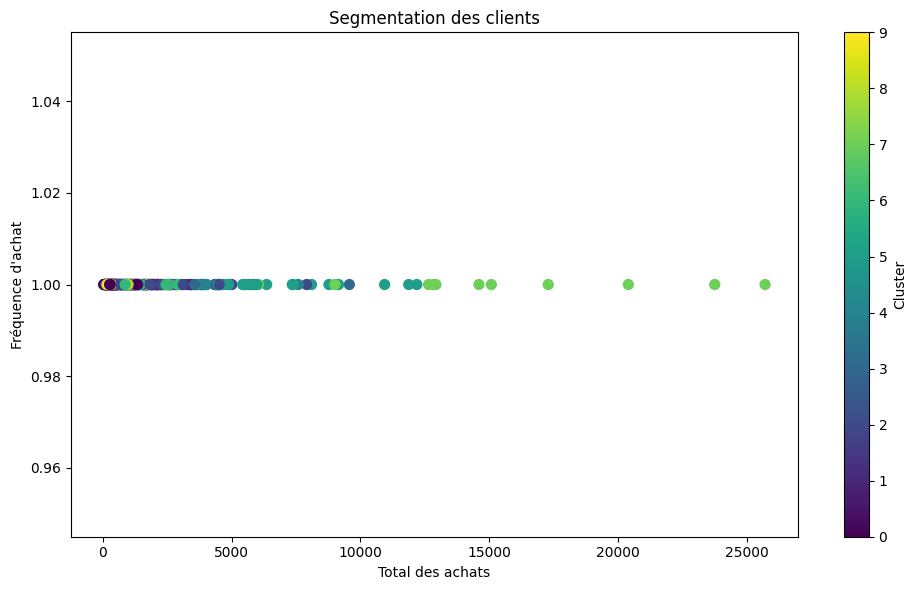

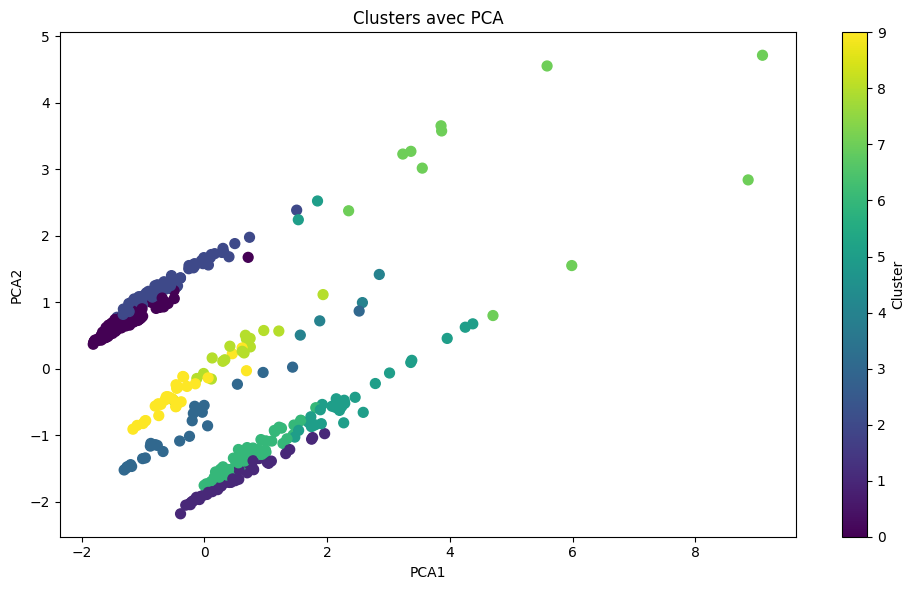

  fk_client  Total_Achete  Freq_Achat      Cluster_Name  \
0    777446       2027.22           1      High Spender   
1    784240       1331.26           1      High Spender   
2    788861       9027.42           1      High Spender   
3    789265       3230.00           1      High Spender   
4    789932       2128.95           1      High Spender   
5    790110       2737.89           1      High Spender   
6    791988        131.82           1      High Spender   
7    793173       4655.97           1      High Spender   
8    794663        212.40           1  Occasional Buyer   
9    794912       1231.86           1      High Spender   

                    Recommandation_Produit  
0  G-Savon liquideSABONA400ML Citron fresh  
1  G-Savon liquideSABONA400ML Citron fresh  
2  G-Savon liquideSABONA400ML Citron fresh  
3  G-Savon liquideSABONA400ML Citron fresh  
4  C-Fromage aux piments rougesMERIAHAu Kg  
5  C-Piment douxEL KHABIALe sachet de 100g  
6  C-Piment douxEL KHABIALe sachet 

In [7]:
import pandas as pd
import numpy as np
import mysql.connector
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ✅ Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# ✅ Load tables from DW
fact_vente = pd.read_sql("SELECT * FROM fact_vente", conn)
dim_client = pd.read_sql("SELECT * FROM dim_client", conn)
dim_produit = pd.read_sql("SELECT * FROM dim_produit", conn)
conn.close()

# 🧹 Harmonisation des clés
fact_vente['fk_client'] = fact_vente['fk_client'].astype(str)
dim_client['client_id'] = dim_client['client_id'].astype(str)
fact_vente['produit_fk'] = fact_vente['produit_fk'].astype(str)
dim_produit['produit_pk'] = dim_produit['produit_pk'].astype(str)

# 🔗 Jointures
df = pd.merge(fact_vente, dim_client, left_on='fk_client', right_on='client_id', how='left')
df = pd.merge(df, dim_produit, left_on='produit_fk', right_on='produit_pk', how='left')

# 🧠 Features clients (✔ corrected column names)
total_achete = df.groupby('fk_client')['prix_total'].sum().reset_index(name='Total_Achete')
nb_produits = df.groupby('fk_client')['quantite_achetee'].sum().reset_index(name='Nb_Produits')
categorie_preferee = df.groupby('fk_client')['categorie_produit'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').reset_index(name='Categorie_preferee')
freq_achat = df.groupby('fk_client')['date_d_achat_x'].nunique().reset_index(name='Freq_Achat')
montant_moyen = df.groupby('fk_client')['prix_unitaire'].mean().reset_index(name='Montant_moyen')

# ➕ Fusion des features
client_data = total_achete.merge(nb_produits, on='fk_client')
client_data = client_data.merge(categorie_preferee, on='fk_client')
client_data = client_data.merge(freq_achat, on='fk_client')
client_data = client_data.merge(montant_moyen, on='fk_client')

# 🔧 Gestion des valeurs manquantes
num_cols = ['Total_Achete', 'Nb_Produits', 'Freq_Achat', 'Montant_moyen']
client_data[num_cols] = client_data[num_cols].fillna(client_data[num_cols].mean())

# 🔣 Encodage de la catégorie préférée
client_data = pd.get_dummies(client_data, columns=['Categorie_preferee'], drop_first=True)

# ⚖️ Normalisation
scaler = StandardScaler()
features_to_scale = ['Total_Achete', 'Nb_Produits', 'Freq_Achat', 'Montant_moyen'] + \
                    [col for col in client_data.columns if 'Categorie_preferee' in col]
client_data_scaled = scaler.fit_transform(client_data[features_to_scale])

# 🔍 Recherche du meilleur k
best_silhouette_score = -1
best_k = 2
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(client_data_scaled)
    score = silhouette_score(client_data_scaled, clusters)
    if score > best_silhouette_score:
        best_silhouette_score = score
        best_k = k

# 🧠 Clustering final
kmeans = KMeans(n_clusters=best_k, random_state=42)
client_data['Cluster'] = kmeans.fit_predict(client_data_scaled)

# 🏷️ Étiquettes des clusters
cluster_labels = {}
for i in range(best_k):
    cdata = client_data[client_data['Cluster'] == i]
    if cdata['Total_Achete'].mean() > 1000 and cdata['Freq_Achat'].mean() > 5:
        cluster_labels[i] = 'High Spender, Frequent Buyer'
    elif cdata['Total_Achete'].mean() > 1000:
        cluster_labels[i] = 'High Spender'
    elif cdata['Freq_Achat'].mean() > 5:
        cluster_labels[i] = 'Frequent Buyer'
    else:
        cluster_labels[i] = 'Occasional Buyer'

client_data['Cluster_Name'] = client_data['Cluster'].map(cluster_labels)

# ✅ Score silhouette
print(f"Silhouette Score for k={best_k}: {best_silhouette_score:.3f}")

# 📊 Visualisation simple
plt.figure(figsize=(10, 6))
plt.scatter(client_data['Total_Achete'], client_data['Freq_Achat'], c=client_data['Cluster'], cmap='viridis', s=50)
plt.title('Segmentation des clients')
plt.xlabel('Total des achats')
plt.ylabel("Fréquence d'achat")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# 📉 PCA
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(client_data_scaled)
client_data['PCA1'] = pca_coords[:, 0]
client_data['PCA2'] = pca_coords[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(client_data['PCA1'], client_data['PCA2'], c=client_data['Cluster'], cmap='viridis', s=50)
plt.title('Clusters avec PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# 🧠 Recommandation produit
df = df.merge(client_data[['fk_client', 'Cluster']], on='fk_client', how='left')

top_categories = (
    df.groupby(['Cluster', 'categorie_produit'])['quantite_achetee']
    .sum()
    .reset_index()
    .sort_values(['Cluster', 'quantite_achetee'], ascending=[True, False])
    .drop_duplicates(subset='Cluster')
    .set_index('Cluster')
)

# 🔁 Génération des recommandations
recommandations = []
for _, row in client_data.iterrows():
    cluster = row['Cluster']
    top_cat = top_categories.loc[cluster]['categorie_produit']
    top_product = (
        df[df['categorie_produit'] == top_cat]
        .groupby('produit')['quantite_achetee']
        .sum()
        .sort_values(ascending=False)
        .index[0]
    )
    recommandations.append(top_product)

client_data['Recommandation_Produit'] = recommandations

# ✅ Affichage final
print(client_data[['fk_client', 'Total_Achete', 'Freq_Achat', 'Cluster_Name', 'Recommandation_Produit']].head(10))


In [6]:
print(df.columns.tolist())


['id_x', 'date_fk', 'fk_client', 'produit_fk', 'quantite_achetee', 'prix_unitaire', 'prix_total', 'mode_paiement', 'saison_achat', 'delivery_fee', 'price_after_delivery', 'date_d_achat_x', 'id_y', 'pk_client', 'client_id', 'ville', 'produit_achete', 'date_d_achat_y', 'id', 'produit', 'marque', 'categorie_produit', 'produit_pk']


C:\Users\Admin\AppData\Local\Temp\ipykernel_8092\758597050.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact_vente = pd.read_sql("SELECT * FROM fact_vente", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8092\758597050.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_produit = pd.read_sql("SELECT * FROM dim_produit", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_8092\758597050.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_date = pd.read_sql("SELECT * FROM `dim_date_(1)`", conn)  # ← updated

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 29040, number of used features: 9
[LightGBM] [Info] Start training from score 11.501257
✅ R² Score: 0.9984
📉 RMSE: 0.54

🎯 Exemple de prédiction:
Valeur réelle: 18.99
Valeur prédite: 18.51


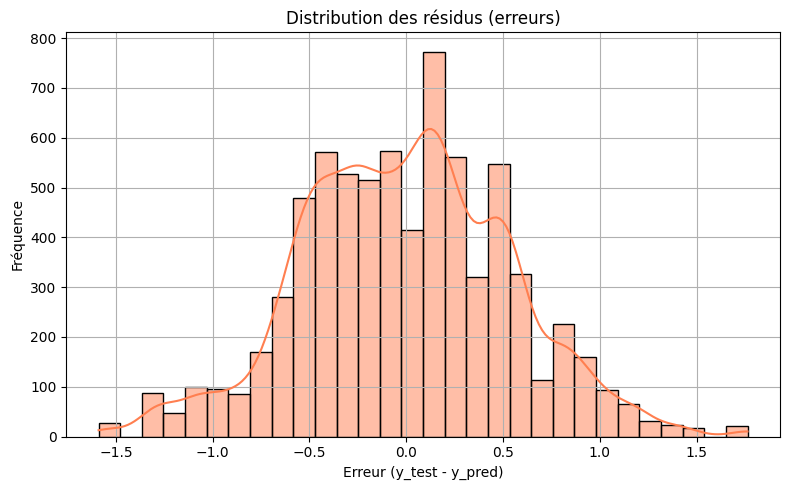

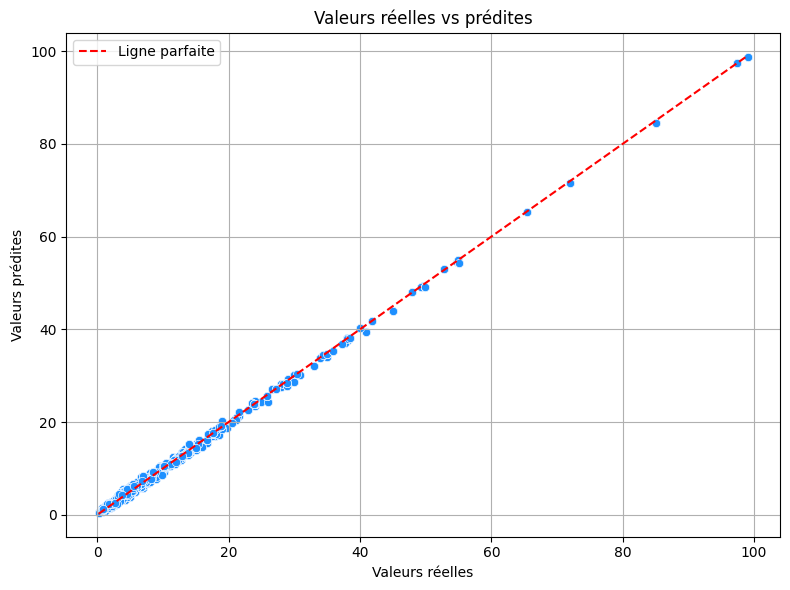

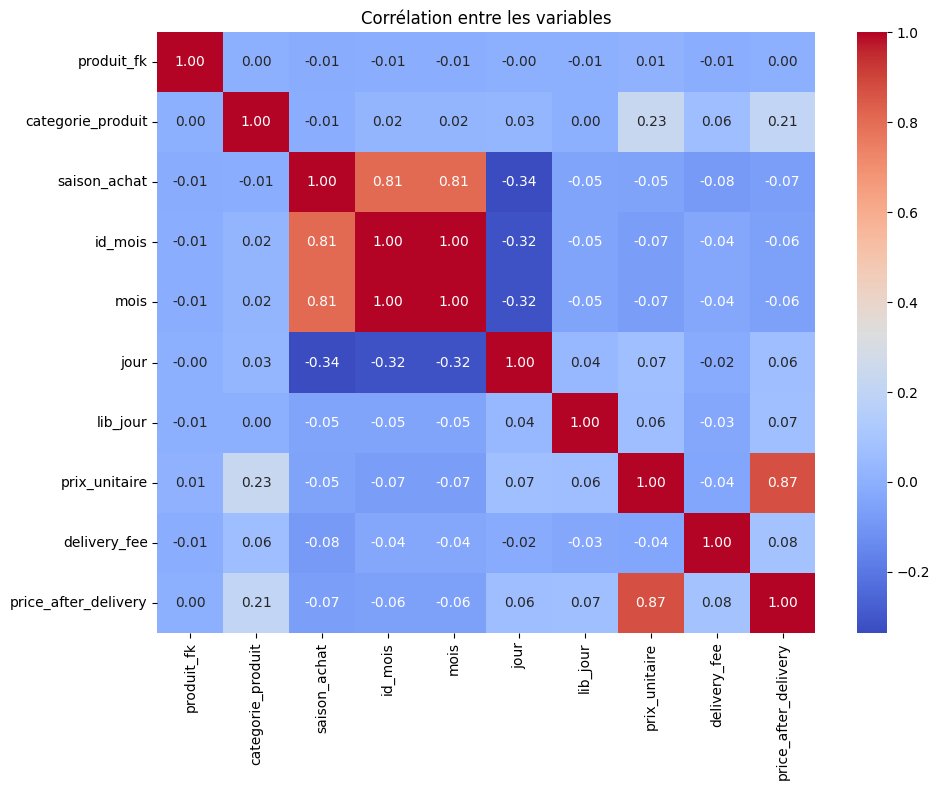

In [2]:
# 📦 Imports
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# 📡 Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# 📥 Load tables
fact_vente = pd.read_sql("SELECT * FROM fact_vente", conn)
dim_produit = pd.read_sql("SELECT * FROM dim_produit", conn)
dim_date = pd.read_sql("SELECT * FROM `dim_date_(1)`", conn)  # ← updated here
conn.close()

# 🔁 Merge tables
vente_produit = fact_vente.merge(dim_produit, left_on='produit_fk', right_on='produit_pk', how='left')
vente_produit = vente_produit.merge(dim_date, left_on='date_fk', right_on='date_pk', how='left')

# 🧹 Select relevant columns
df = vente_produit[[ 
    'produit_fk', 'categorie_produit', 'saison_achat',
    'id_mois', 'mois', 'jour', 'lib_jour',
    'prix_unitaire', 'delivery_fee', 'price_after_delivery'
]].dropna()

# 🧠 Encode categorical variables
label_cols = ['categorie_produit', 'saison_achat', 'lib_jour']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 🎯 Define features and target
X = df.drop(['prix_unitaire'], axis=1)
y = df['prix_unitaire']

# 📤 Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌱 LightGBM model
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

# 📈 Predictions
y_pred = model.predict(X_test)

# 🧮 Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ R² Score: {r2:.4f}")
print(f"📉 RMSE: {rmse:.2f}")

# 🔍 Example prediction
print("\n🎯 Exemple de prédiction:")
print(f"Valeur réelle: {y_test.iloc[0]:.2f}")
print(f"Valeur prédite: {y_pred[0]:.2f}")

# 📊 1. Residual distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='coral')
plt.title("Distribution des résidus (erreurs)")
plt.xlabel("Erreur (y_test - y_pred)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔁 2. Predicted vs Real
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ligne parfaite')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs réelles vs prédites")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔥 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les variables")
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10960\713174284.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact_tourism = pd.read_sql("SELECT * FROM fact_tourism", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10960\713174284.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_client = pd.read_sql("SELECT * FROM dim_client", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10960\713174284.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_date = pd.read_sql("SELECT * FROM `dim_date_(1)`", conn)



Linear Regression:
MSE: 77038.88, R²: -0.0102

Gradient Boosting:
MSE: 62340.25, R²: 0.1825

Random Forest:
MSE: 43112.53, R²: 0.4346

XGBoost:
MSE: 51523.48, R²: 0.3243

CatBoost:
MSE: 46773.12, R²: 0.3866


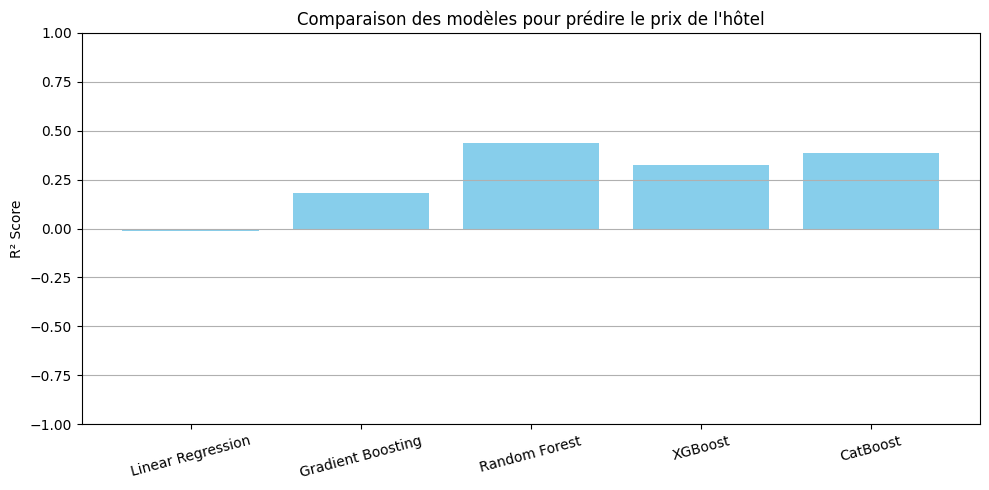

In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import mysql.connector

# 📡 Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# 📥 Load data from DW
fact_tourism = pd.read_sql("SELECT * FROM fact_tourism", conn)
dim_client = pd.read_sql("SELECT * FROM dim_client", conn)
dim_date = pd.read_sql("SELECT * FROM `dim_date_(1)`", conn)
conn.close()

# 🔗 Merge tables
df = fact_tourism.merge(dim_date, left_on='date_fk', right_on='date_pk', how='left')
df = df.merge(dim_client, left_on='hotel_fk', right_on='pk_client', how='left')

# 🔣 One-hot encoding
df = pd.get_dummies(df, columns=['ville', 'produit_achete'], drop_first=True)

# 🧠 Feature selection
features = [
    'nb_etoiles', 'distance_centre_ville', 'rating', 'nbr_travellers',
    'mois', 'annee'
] + [col for col in df.columns if col.startswith('ville_') or col.startswith('produit_achete_')]

X = df[features]
y = df['price']

# 🎯 Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

# 📈 Train & Evaluate
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name}:\nMSE: {mse:.2f}, R²: {r2:.4f}")
    scores[name] = r2

# 📊 Visualize results
plt.figure(figsize=(10, 5))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.ylabel("R² Score")
plt.title("Comparaison des modèles pour prédire le prix de l'hôtel")
plt.ylim(-1, 1)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Meilleurs paramètres trouvés :  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest avec recherche de grille :

MSE : 38525.63
MAE : 128.05
R² : 0.4948


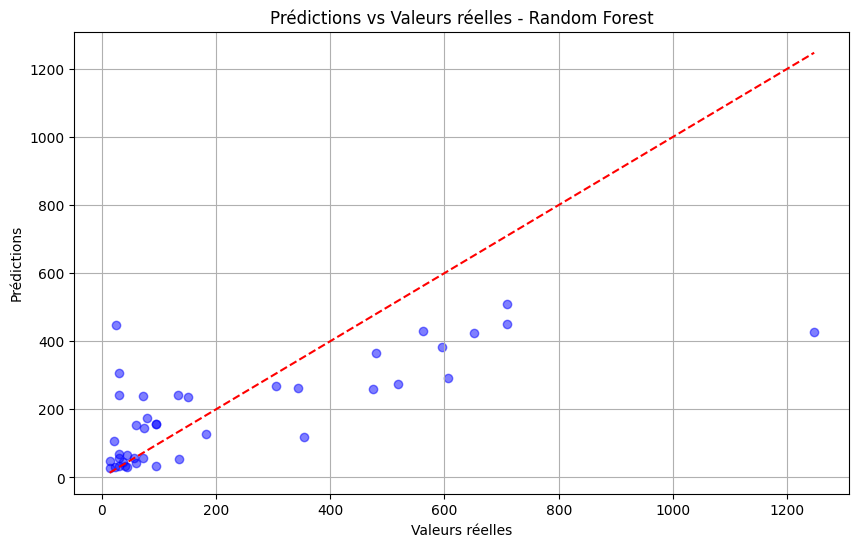

In [2]:
# Import des bibliothèques nécessaires pour l'optimisation des hyperparamètres
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Définir le modèle RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Recherche en grille pour l'optimisation des hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV pour la recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Entraîner le modèle sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

# Utiliser le meilleur modèle trouvé pour faire des prédictions
best_rf = grid_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_rf.predict(X_test)

# Évaluation des performances
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nRandom Forest avec recherche de grille :\n")
print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"R² : {r2:.4f}")

# Visualiser les erreurs de prédiction
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Prédictions vs Valeurs réelles - Random Forest")
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.grid(True)
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_13932\1488155380.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact_vente = pd.read_sql("SELECT * FROM fact_vente", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13932\1488155380.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact_tourism = pd.read_sql("SELECT * FROM fact_tourism", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13932\1488155380.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact_flight = pd.read_sql("SELECT * FROM fact_flight", conn)
C:\U

✅ Mean Squared Error (MSE): 21633.11
✅ R²: 0.9970


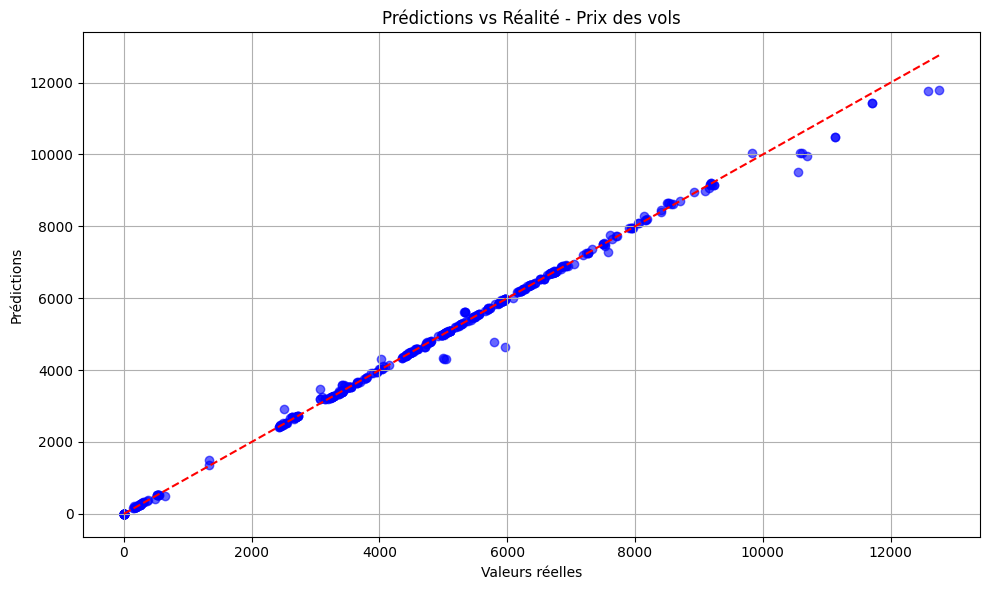

📉 Validation croisée MSE moyen: 35061.39

📊 Importances des caractéristiques:
saison_touristique: 0.0000
nombre_escales: 0.0001
distance_vol_km: 0.0202
cancelled: 0.0001
taxe_price: 0.9776
mois: 0.0002
jour: 0.0002
annee: 0.0006
semaine: 0.0001
region_Nouvelle-Aquitaine: 0.0001
nom_Lille: 0.0000
date_0006-07-05 00:00:00: 0.0000
date_0007-03-07 00:00:00: 0.0000
date_0007-04-06 00:00:00: 0.0000
date_0008-12-05 00:00:00: 0.0000
date_0009-10-06 00:00:00: 0.0000
date_0009-11-04 00:00:00: 0.0000
date_0010-08-04 00:00:00: 0.0002
date_0010-09-03 00:00:00: 0.0000
date_0011-05-06 00:00:00: 0.0000
date_0011-07-04 00:00:00: 0.0000
date_0011-07-06 00:00:00: 0.0000
date_0012-04-05 00:00:00: 0.0000
date_0013-04-03 00:00:00: 0.0000
date_0014-11-04 00:00:00: 0.0000
date_0015-05-08 00:00:00: 0.0000
date_0015-05-09 00:00:00: 0.0000
date_0015-06-04 00:00:00: 0.0000
date_0015-06-06 00:00:00: 0.0000
date_0015-08-04 00:00:00: 0.0000
date_0015-08-06 00:00:00: 0.0000
date_0015-09-03 00:00:00: 0.0000
date_0015-

In [4]:
# 📦 Imports
import pandas as pd
import mysql.connector
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 📡 Connect to MySQL DW
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# 📥 Load all relevant tables
fact_vente = pd.read_sql("SELECT * FROM fact_vente", conn)
fact_tourism = pd.read_sql("SELECT * FROM fact_tourism", conn)
fact_flight = pd.read_sql("SELECT * FROM fact_flight", conn)
dim_produit = pd.read_sql("SELECT * FROM dim_produit", conn)
dim_client = pd.read_sql("SELECT * FROM dim_client", conn)
dim_flight = pd.read_sql("SELECT * FROM dim_flight", conn)
dim_airline = pd.read_sql("SELECT * FROM dim_airline", conn)
dim_localisation = pd.read_sql("SELECT * FROM dim_localisation", conn)
dim_date = pd.read_sql("SELECT * FROM `dim_date_(1)`", conn)
conn.close()

# 🧼 Clean duplicate-prone columns
for df_to_clean in [dim_localisation, dim_date, dim_airline, dim_flight, dim_client, dim_produit]:
    df_to_clean.drop(columns=['id', 'id_x', 'id_y'], errors='ignore', inplace=True)

# 🔗 Merge for the flight pricing use case
df = pd.merge(fact_flight, dim_flight, left_on='fk_flights', right_on='id_flights', how='left')
df['airline'] = pd.to_numeric(df['airline'], errors='coerce')
df = pd.merge(df, dim_airline, left_on='airline', right_on='id_airline', how='left')
df = pd.merge(df, dim_localisation, left_on='localisation_fk', right_on='localisation_id', how='left')
df = pd.merge(df, dim_date, left_on='date_fk', right_on='date_pk', how='left')

# 🧠 Feature selection
features = [
    'saison_touristique', 'nombre_escales', 'distance_vol_km', 'cancelled', 'taxe_price',
    'airlinename', 'region', 'nom', 'date', 'mois', 'jour', 'annee', 'semaine', 'trimestre'
]
target = 'prix_final'

# 🔣 Encoding categorical features
df_encoded = pd.get_dummies(df[features], drop_first=True)
y = df[target]

# 📤 Train/Test split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# 🌲 Random Forest model
model = RandomForestRegressor(
    n_estimators=100, max_depth=10,
    min_samples_split=5, min_samples_leaf=5, random_state=42
)
model.fit(X_train, y_train)

# 📈 Predict & evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ R²: {r2:.4f}")

# 📊 Plot prediction vs reality
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Réalité - Prix des vols')
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔁 Cross-validation
cv_scores = cross_val_score(model, df_encoded, y, cv=5, scoring='neg_mean_squared_error')
print(f"📉 Validation croisée MSE moyen: {-cv_scores.mean():.2f}")

# 🔍 Feature importances
importances = model.feature_importances_
print("\n📊 Importances des caractéristiques:")
for feature, importance in zip(df_encoded.columns, importances):
    print(f"{feature}: {importance:.4f}")


C:\Users\Admin\AppData\Local\Temp\ipykernel_13932\3458580414.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fact_flight = pd.read_sql("SELECT * FROM fact_flight", conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13932\3458580414.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_flight = pd.read_sql("SELECT * FROM dim_flight", conn)


Colonnes disponibles : ['id_x', 'fk_flights', 'localisation_fk', 'date_fk', 'price', 'saison_touristique', 'nombre_escales', 'distance_vol_km', 'cancelled', 'taxe_price', 'prix_final', 'id_y', 'id_flights', 'airline', 'departure_date', 'departure_hour', 'arrival_date', 'arrival_hour', 'code_pay']

🎯 Score Cross Validation (Moyenne) : 0.90

✅ Précision sur le Test : 0.90

 Rapport de classification :
              precision    recall  f1-score   support

  Non annulé       0.90      1.00      0.95       643
      Annulé       1.00      0.00      0.00        71

    accuracy                           0.90       714
   macro avg       0.95      0.50      0.47       714
weighted avg       0.91      0.90      0.85       714



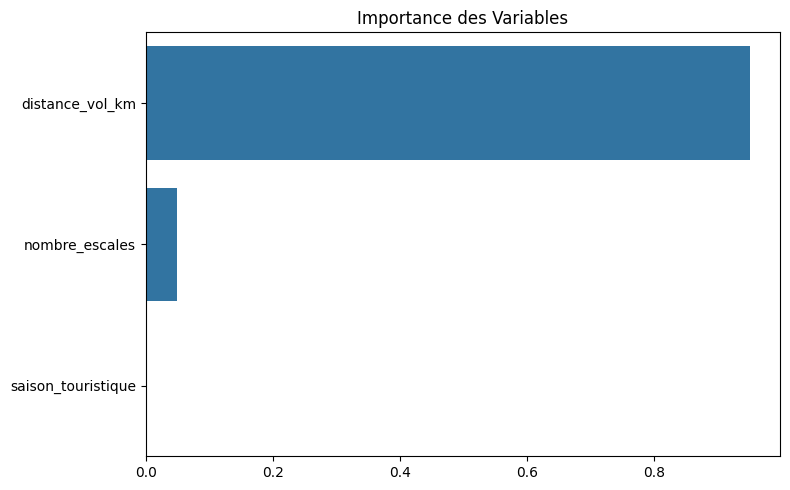

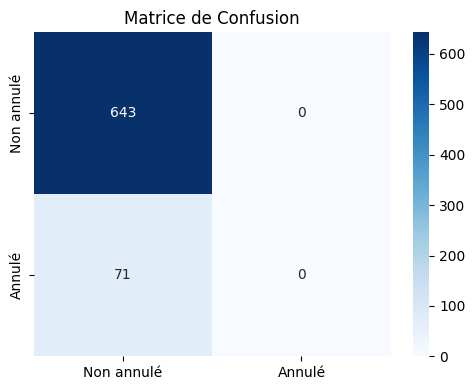

In [6]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 📡 Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# 📥 Load data from DW
fact_flight = pd.read_sql("SELECT * FROM fact_flight", conn)
dim_flight = pd.read_sql("SELECT * FROM dim_flight", conn)
conn.close()

# 🔗 Merge tables
data = pd.merge(fact_flight, dim_flight, how='inner', left_on='fk_flights', right_on='id_flights')

# 🧠 Feature selection
features = ['distance_vol_km', 'nombre_escales', 'saison_touristique']
target = 'cancelled'

# 🔍 Check available columns
print("Colonnes disponibles :", data.columns.tolist())

# ✂️ Subset
X = data[features]
y = data[target]

# ⚖️ Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧪 Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 🌲 Train Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 🔁 Cross-validation
cv_score = cross_val_score(model, X_scaled, y, cv=5)
print(f"\n🎯 Score Cross Validation (Moyenne) : {cv_score.mean():.2f}")

# 🧾 Predictions
y_pred = model.predict(X_test)

print(f"\n✅ Précision sur le Test : {accuracy_score(y_test, y_pred):.2f}")
print("\n Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=['Non annulé', 'Annulé'], zero_division=1))

# 📊 Feature importances
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Importance des Variables")
plt.tight_layout()
plt.show()

# 🔲 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non annulé', 'Annulé'],
            yticklabels=['Non annulé', 'Annulé'])
plt.title("Matrice de Confusion")
plt.tight_layout()
plt.show()


In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import mysql.connector

# 🔌 Connect to MySQL DW
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)


generate enhanced dataset for nn 

In [2]:
# 🔄 Load Data
print("🔄 Loading dim_client...")
dim_client = pd.read_sql("SELECT client_id, produit_achete FROM dim_client", conn)

print("🔄 Loading all_products...")
all_products = pd.read_sql("SELECT id, product_full, marque, category, prix_2025_winter FROM all_products", conn)

# 🛠 Prepare all_products
all_products['product_full'] = all_products['product_full'].str.strip()
all_products['marque'] = all_products['marque'].fillna("Unknown")
all_products['category'] = all_products['category'].fillna("Unknown")

# 🔀 Merge
print("🔄 Merging client purchases with products...")
enhanced = dim_client.merge(
    all_products,
    left_on="produit_achete",
    right_on="product_full",
    how="left"
)

# 🛠 Handle missing matches silently
missing = enhanced[enhanced['id'].isna()]
if not missing.empty:
    for idx in tqdm(missing.index, desc="Completing product info"):
        random_product = all_products.sample(1).iloc[0]
        enhanced.at[idx, 'id'] = random_product['id']
        enhanced.at[idx, 'product_full'] = random_product['product_full']
        enhanced.at[idx, 'marque'] = random_product['marque']
        enhanced.at[idx, 'category'] = random_product['category']
        enhanced.at[idx, 'prix_2025_winter'] = random_product['prix_2025_winter']

# 🛠 Final formatting
enhanced['categorie_enc'] = pd.factorize(enhanced['category'])[0]
enhanced['produit_enc'] = pd.factorize(enhanced['product_full'])[0]
enhanced['prix_2025_winter'] = enhanced['prix_2025_winter'].fillna(0)
enhanced['rating'] = np.log1p(enhanced['prix_2025_winter'])

final = enhanced[['client_id', 'id', 'product_full', 'marque', 'category', 'prix_2025_winter', 'categorie_enc', 'produit_enc', 'rating']].rename(columns={
    'id': 'product_id',
    'product_full': 'product_name',
    'marque': 'brand',
    'category': 'category',
    'prix_2025_winter': 'price'
})

# 💾 Save
final.to_csv("client_product_enhanced_final.csv", index=False)
print("✅ File saved: client_product_enhanced_final.csv")


🔄 Loading dim_client...


C:\Users\Admin\AppData\Local\Temp\ipykernel_16708\4010550963.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_client = pd.read_sql("SELECT client_id, produit_achete FROM dim_client", conn)


🔄 Loading all_products...
🔄 Merging client purchases with products...


C:\Users\Admin\AppData\Local\Temp\ipykernel_16708\4010550963.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_products = pd.read_sql("SELECT id, product_full, marque, category, prix_2025_winter FROM all_products", conn)
Completing product info: 100%|██████████| 830961/830961 [08:18<00:00, 1668.34it/s]


✅ File saved: client_product_enhanced_final.csv


train recommender 

Epoch 1/5 - Loss: 0.3672
Epoch 2/5 - Loss: 0.0983
Epoch 3/5 - Loss: 0.0235
Epoch 4/5 - Loss: 0.1007
Epoch 5/5 - Loss: 0.0267
✅ Model and mappings saved!


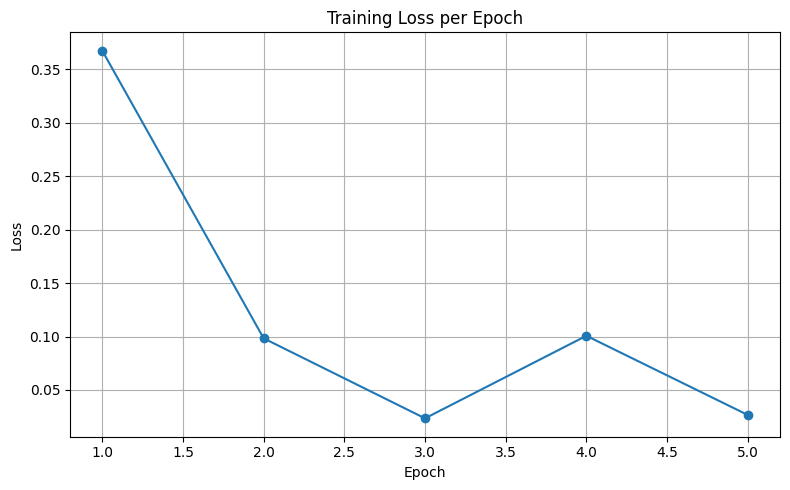

In [4]:
# 🔥 Load dataset
df = pd.read_csv("client_product_enhanced_final.csv")

# 🛠 Encode
df['user_enc'], user_index = pd.factorize(df['client_id'])
df['item_enc'], item_index = pd.factorize(df['product_id'])
n_users = df['user_enc'].nunique()
n_items = df['item_enc'].nunique()
n_brands = df['brand'].nunique()
n_categories = df['categorie_enc'].nunique()

# 🗃 Dataset Class
class PurchaseDataset(Dataset):
    def __init__(self, dataframe):
        self.users = torch.tensor(dataframe['user_enc'].values, dtype=torch.long)
        self.items = torch.tensor(dataframe['item_enc'].values, dtype=torch.long)
        self.brands = torch.tensor(dataframe['brand'].astype('category').cat.codes.values, dtype=torch.long)
        self.categories = torch.tensor(dataframe['categorie_enc'].values, dtype=torch.long)
        self.prices = torch.tensor(dataframe['price'].values, dtype=torch.float32)
        self.ratings = torch.tensor(dataframe['rating'].values, dtype=torch.float32)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.brands[idx], self.categories[idx], self.prices[idx], self.ratings[idx]

# 🧠 Model
class RecommenderNN(nn.Module):
    def __init__(self, n_users, n_items, n_brands, n_categories, emb_size=50):
        super().__init__()
        self.user_emb = nn.Embedding(n_users, emb_size)
        self.item_emb = nn.Embedding(n_items, emb_size)
        self.brand_emb = nn.Embedding(n_brands, emb_size // 2)
        self.cat_emb = nn.Embedding(n_categories, emb_size // 2)

        self.fc = nn.Sequential(
            nn.Linear(emb_size*2 + emb_size + 1, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, user, item, brand, category, price):
        u = self.user_emb(user)
        i = self.item_emb(item)
        b = self.brand_emb(brand)
        c = self.cat_emb(category)
        x = torch.cat([u, i, b, c, price.unsqueeze(1)], dim=1)
        return self.fc(x).squeeze(1)

# 🔥 Training
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)
train_dataset = PurchaseDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RecommenderNN(n_users, n_items, n_brands, n_categories).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

epochs = 5
train_losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for user, item, brand, category, price, rating in train_loader:
        user, item, brand, category, price, rating = user.to(device), item.to(device), brand.to(device), category.to(device), price.to(device), rating.to(device)
        optimizer.zero_grad()
        preds = model(user, item, brand, category, price)
        loss = loss_fn(preds, rating)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

# 💾 Save model and mappings
torch.save(model.state_dict(), "recommender_model.pth")
user_index.to_series().to_csv("user_mapping.csv")
item_index.to_series().to_csv("item_mapping.csv")
print("✅ Model and mappings saved!")

# 📈 Plot training loss
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


Generate client_churn_dataset.csv

In [1]:
# 🚀 Generate Churn Dataset from DW

import pandas as pd
import mysql.connector

# ---------------------------
# 1. Connect to DW
# ---------------------------
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="product_catalogue"
)

# ---------------------------
# 2. Load Data
# ---------------------------
dim_client = pd.read_sql("SELECT * FROM dim_client", conn)
conn.close()

# ---------------------------
# 3. Preprocessing
# ---------------------------
dim_client['date_d_achat'] = pd.to_datetime(dim_client['date_d_achat'], errors='coerce')
dim_client = dim_client.dropna(subset=['date_d_achat'])
dim_client = dim_client.sort_values(by=['client_id', 'date_d_achat'])

# ---------------------------
# 4. Feature Engineering
# ---------------------------
last_purchase = dim_client.groupby('client_id')['date_d_achat'].max().reset_index()
reference_date = last_purchase['date_d_achat'].max() + pd.Timedelta(days=1)
last_purchase['days_since_last_purchase'] = (reference_date - last_purchase['date_d_achat']).dt.days
last_purchase['churn'] = last_purchase['days_since_last_purchase'].apply(lambda x: 1 if x > 90 else 0)

nb_achats = dim_client.groupby('client_id')['produit_achete'].count().reset_index(name='nb_achats')
freq_achat = dim_client.groupby('client_id')['date_d_achat'].nunique().reset_index(name='freq_achat')

active_span = dim_client.groupby('client_id')['date_d_achat'].agg(['min', 'max']).reset_index()
active_span['total_days_active'] = (active_span['max'] - active_span['min']).dt.days

avg_days = freq_achat.merge(active_span[['client_id', 'total_days_active']], on='client_id')
avg_days['avg_days_between'] = avg_days['total_days_active'] / avg_days['freq_achat']

# ---------------------------
# 5. Final Merge
# ---------------------------
df_churn = last_purchase.drop(columns='date_d_achat') \
    .merge(nb_achats, on='client_id') \
    .merge(freq_achat, on='client_id') \
    .merge(avg_days[['client_id', 'total_days_active', 'avg_days_between']], on='client_id')

# ---------------------------
# 6. Export
# ---------------------------
print("✅ Churn dataset preview:")
display(df_churn.head())

df_churn.to_csv("client_churn_dataset.csv", index=False)
print("📁 File saved: client_churn_dataset.csv")


C:\Users\Admin\AppData\Local\Temp\ipykernel_9516\211164501.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dim_client = pd.read_sql("SELECT * FROM dim_client", conn)


✅ Churn dataset preview:


,client_id,days_since_last_purchase,churn,nb_achats,freq_achat,total_days_active,avg_days_between
0,1,8,0,116,42,701,16.690476
1,2,13,0,96,29,714,24.620690
2,3,60,0,57,21,651,31.000000
3,4,58,0,74,28,667,23.821429
4,5,6,0,113,43,709,16.488372


📁 File saved: client_churn_dataset.csv


Train churn_model.pkl

✅ Dataset loaded with shape: (9213, 7)


,client_id,days_since_last_purchase,churn,nb_achats,freq_achat,total_days_active,avg_days_between
0,1,8,0,116,42,701,16.690476
1,2,13,0,96,29,714,24.620690
2,3,60,0,57,21,651,31.000000
3,4,58,0,74,28,667,23.821429
4,5,6,0,113,43,709,16.488372


🔍 Original distribution → Churned: 292 | Loyal: 8921
✅ Balanced dataset shape: (584, 7)
⚖️ Class distribution:
 churn
0    292
1    292
Name: count, dtype: int64

🎯 Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

       Loyal       1.00      1.00      1.00        59
     Churned       1.00      1.00      1.00        58

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

🧱 Confusion Matrix:


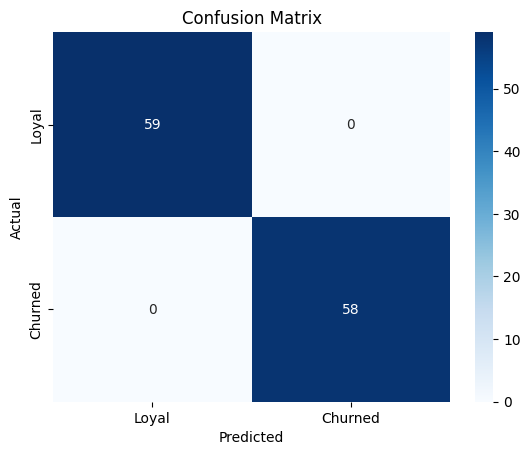

C:\Users\Admin\AppData\Local\Temp\ipykernel_9516\3360364477.py:88: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


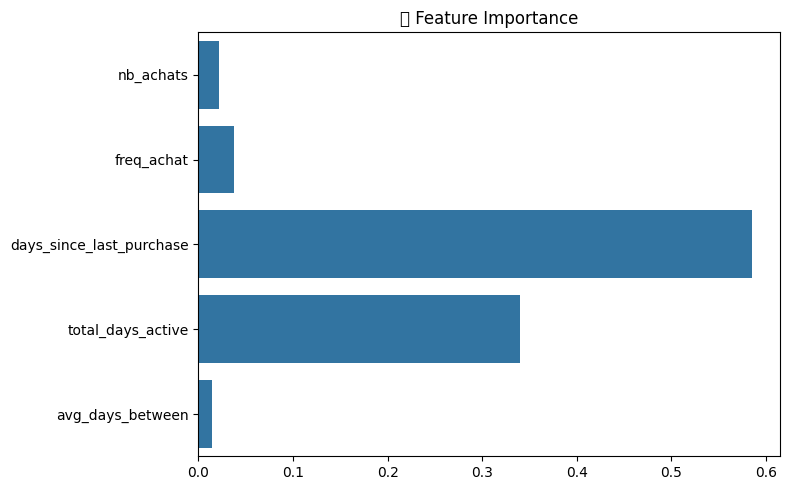


📉 Cross-Validation Accuracy (mean): 0.9983
💾 Model saved as: churn_model.pkl


In [2]:
# 🚀 Train Random Forest Churn Model

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ---------------------------
# 1. Load churn dataset
# ---------------------------
df = pd.read_csv("client_churn_dataset.csv")
print("✅ Dataset loaded with shape:", df.shape)
display(df.head())

# ---------------------------
# 2. Clean Data
# ---------------------------
df = df.dropna(subset=['days_since_last_purchase'])
df = df[df['days_since_last_purchase'] >= 0]

# ---------------------------
# 3. Balance Dataset
# ---------------------------
df_loyal = df[df['churn'] == 0]
df_churned = df[df['churn'] == 1]

print(f"🔍 Original distribution → Churned: {len(df_churned)} | Loyal: {len(df_loyal)}")

df_loyal_downsampled = resample(df_loyal, replace=False, n_samples=len(df_churned), random_state=42)
df_balanced = pd.concat([df_loyal_downsampled, df_churned])

print(f"✅ Balanced dataset shape: {df_balanced.shape}")
print("⚖️ Class distribution:\n", df_balanced["churn"].value_counts())

# ---------------------------
# 4. Features and Target
# ---------------------------
features = ['nb_achats', 'freq_achat', 'days_since_last_purchase', 'total_days_active', 'avg_days_between']
target = 'churn'

X = df_balanced[features]
y = df_balanced[target]

# ---------------------------
# 5. Train/Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 6. Train Model
# ---------------------------
model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
model.fit(X_train, y_train)

# ---------------------------
# 7. Evaluation
# ---------------------------
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {acc:.4f}\n")

labels = unique_labels(y_test, y_pred)
label_names = ["Loyal", "Churned"]
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, labels=labels, target_names=[label_names[i] for i in labels]))

print("🧱 Confusion Matrix:")
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------
# 8. Feature Importance
# ---------------------------
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("🎯 Feature Importance")
plt.tight_layout()
plt.show()

# ---------------------------
# 9. Cross-validation
# ---------------------------
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"\n📉 Cross-Validation Accuracy (mean): {cv_scores.mean():.4f}")

# ---------------------------
# 10. Save Model
# ---------------------------
joblib.dump(model, "churn_model.pkl")
print("💾 Model saved as: churn_model.pkl")
